In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/Prabhu-Tejas/CSV-files/main/company.csv")


In [2]:
data.head()

,RDSpend,Administration,MarketingSpend,Revenue
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   Revenue         50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [4]:
data.corr()

,RDSpend,Administration,MarketingSpend,Revenue
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Revenue,0.972900,0.200717,0.747766,1.000000


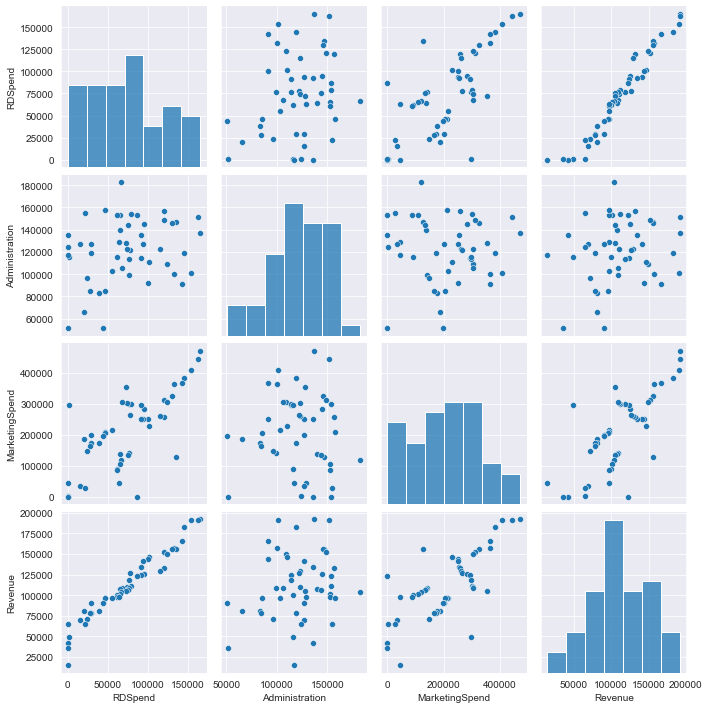

In [5]:
import seaborn as sns
sns.set_style(style = 'darkgrid')
sns.pairplot(data,)

In [6]:
data.columns

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Revenue'], dtype='object')

In [7]:
# Building model 
import statsmodels.formula.api as smf 
model = smf.ols("Revenue ~Administration+RDSpend+MarketingSpend",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        22:28:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

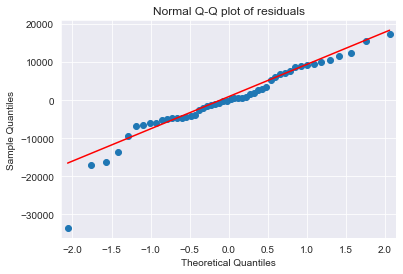

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# CHeck Homoscedasticity

In [9]:
def std_values(vals):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standard Residuals')

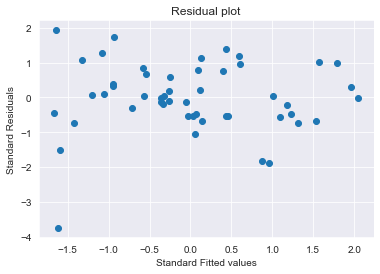

In [10]:
plt.scatter(std_values(model.fittedvalues),
           std_values(model.resid))
plt.title("Residual plot")
plt.xlabel("Standard Fitted values")
plt.ylabel("Standard Residuals")

# Influence pLot

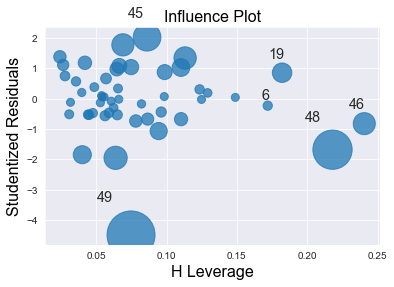

In [11]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

<StemContainer object of 3 artists>

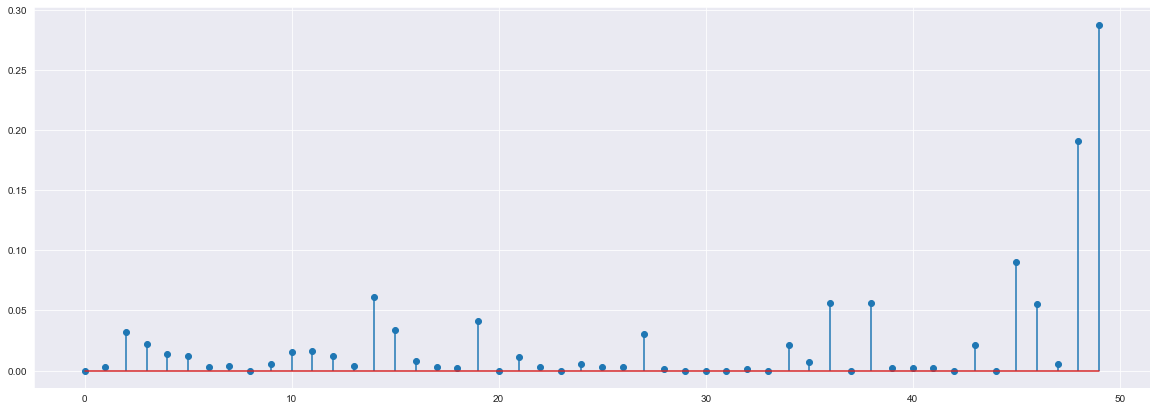

In [12]:
model_influ_v = model.get_influence()
(c_v, _ ) = model_influ_v.cooks_distance

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c_v,3))


In [13]:
data[data.index.isin([49, 48])]

,RDSpend,Administration,MarketingSpend,Revenue
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [14]:
# Drop the parameters which are having high influence

In [15]:
data1 = data.drop(data.index[[49,48]],axis = 0).reset_index()
data1.shape

(48, 5)

In [16]:
model2 = smf.ols("Revenue ~Administration+RDSpend+MarketingSpend",data = data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           2.03e-31
Time:                        22:29:00   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
RDSpend            0.7895      0.036     21.718      0.000       0.716       0.863
MarketingSpend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

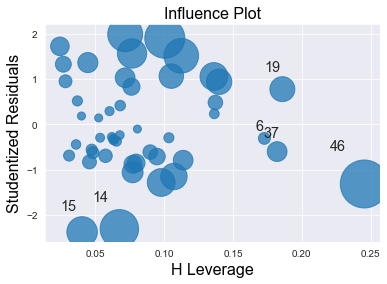

In [17]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

<StemContainer object of 3 artists>

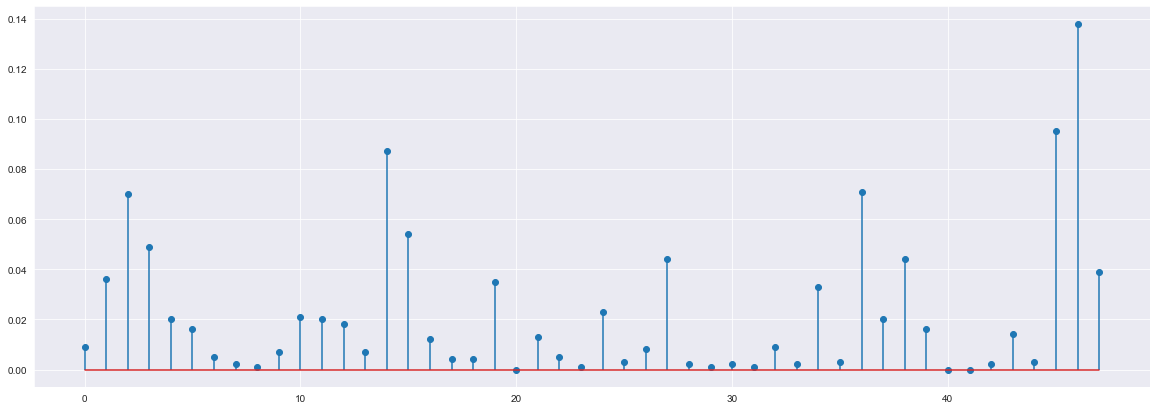

In [18]:
model_influ_v = model2.get_influence()
(c_v, _ ) = model_influ_v.cooks_distance

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data1)),np.round(c_v,3))


In [19]:
(np.argmax(c_v),np.max(c_v))

(46, 0.13829133994334228)

In [20]:
# since cooks distance highest answer is less than 1 , we can stop removing data points and proceed with this model.

# RMSE

In [21]:
pred = model2.predict(data1)

In [22]:
np.sqrt(np.mean((data1.Revenue - pred)**2))

7036.484810004802

# Predicting for new data ( dummy data ) 

In [23]:
new_data=pd.DataFrame({'Administration':40,"RDSpend":95,"MarketingSpend":102},index=[1])

In [24]:
59100 - 0.063*40 + 0.7892*95 + 0.0169*102

59174.177800000005

In [25]:
model2.predict(new_data)

1    59172.684696
dtype: float64